In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
df = pd.read_json('../Data/combined_onehot.json')

In [6]:
from src.mymods import correlation_info

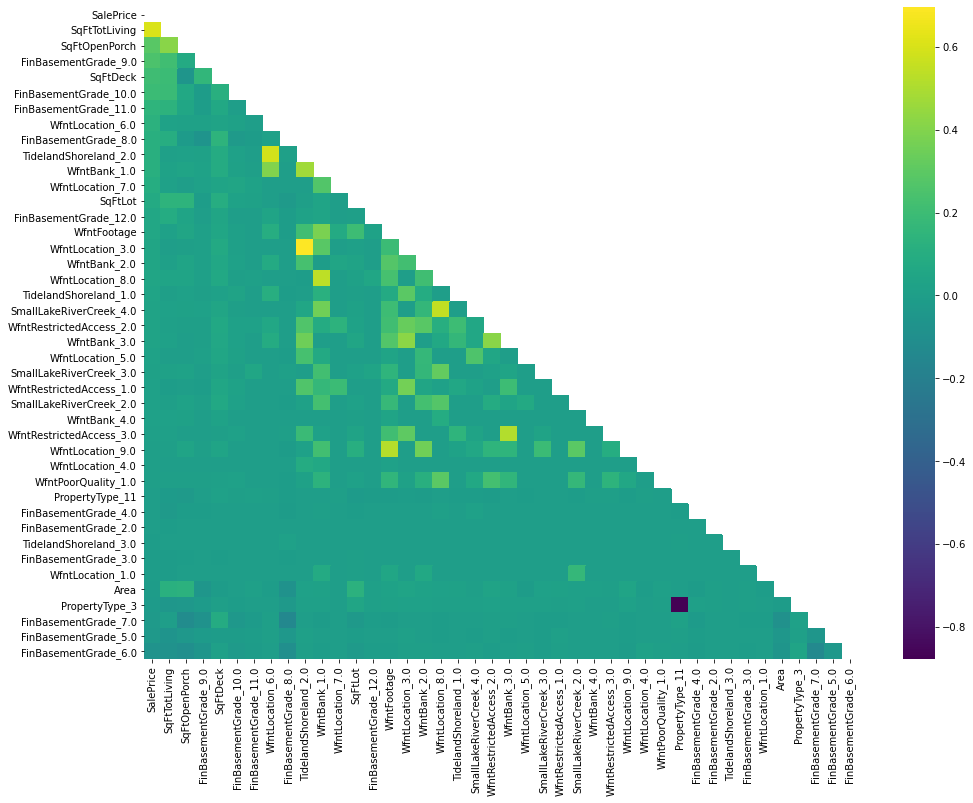

In [8]:
top_corr, graph = correlation_info(df, 'SalePrice', -.5)

In [9]:
top_corr

['SqFtTotLiving',
 'SqFtOpenPorch',
 'FinBasementGrade_9.0',
 'SqFtDeck',
 'FinBasementGrade_10.0',
 'FinBasementGrade_11.0',
 'WfntLocation_6.0',
 'FinBasementGrade_8.0',
 'TidelandShoreland_2.0',
 'WfntBank_1.0',
 'WfntLocation_7.0',
 'SqFtLot',
 'FinBasementGrade_12.0',
 'WfntFootage',
 'WfntLocation_3.0',
 'WfntBank_2.0',
 'WfntLocation_8.0',
 'TidelandShoreland_1.0',
 'SmallLakeRiverCreek_4.0',
 'WfntRestrictedAccess_2.0',
 'WfntBank_3.0',
 'WfntLocation_5.0',
 'SmallLakeRiverCreek_3.0',
 'WfntRestrictedAccess_1.0',
 'SmallLakeRiverCreek_2.0',
 'WfntBank_4.0',
 'WfntRestrictedAccess_3.0',
 'WfntLocation_9.0',
 'WfntLocation_4.0',
 'WfntPoorQuality_1.0',
 'PropertyType_11',
 'FinBasementGrade_4.0',
 'FinBasementGrade_2.0',
 'TidelandShoreland_3.0',
 'FinBasementGrade_3.0',
 'WfntLocation_1.0',
 'Area',
 'PropertyType_3',
 'FinBasementGrade_7.0',
 'FinBasementGrade_5.0',
 'FinBasementGrade_6.0']

In [10]:
from src.mymods import model_summary

In [11]:
summary, test_model = model_summary(df,'SalePrice', top_corr)
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              4156.
Date:                Fri, 02 Oct 2020   Prob (F-statistic):                        0.00
Time:                        09:05:55   Log-Likelihood:                     -3.6495e+05
No. Observations:               25903   AIC:                                  7.300e+05
Df Residuals:                   25862   BIC:                                  7.303e+05
Df Model:                          41                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
SqFtTotLiving              259.3568      2.317    111.927      0.000     254.815     263.899
SqFtOpenPorch              217.7915     18.895     11.526      0.000     180.755     254.828
FinBasementGrade_9.0      2.907e+05   1.18e+04     24.726      0.000    2.68e+05    3.14e+05
SqFtDeck                   108.7973     10.134     10.736      0.000      88.934     128.660
FinBasementGrade_10.0     3.541e+05   2.35e+04     15.056      0.000    3.08e+05       4e+05
FinBasementGrade_11.0     5.355e+05   4.25e+04     12.601      0.000    4.52e+05    6.19e+05
WfntLocation_6.0          3.015e+05   2.14e+05      1.407      0.159   -1.18e+05    7.21e+05
FinBasementGrade_8.0      9.551e+04   7088.147     13.475      0.000    8.16e+04    1.09e+05
TidelandShoreland_2.0     7.453e+05   1.94e+05      3.842      0.000    3.65e+05    1.13e+06
WfntBank_1.0             -1.037e+05   1.02e+05     -1.022      0.307   -3.03e+05    9.53e+04
WfntLocation_7.0          1.306e+06   1.25e+05     10.463      0.000    1.06e+06    1.55e+06
SqFtLot                     -0.1154      0.044     -2.647      0.008      -0.201      -0.030
FinBasementGrade_12.0     8.659e+04   1.02e+05      0.849      0.396   -1.13e+05    2.87e+05
WfntFootage                519.0981    123.500      4.203      0.000     277.031     761.166
WfntLocation_3.0         -2.642e+05   2.13e+05     -1.241      0.215   -6.82e+05    1.53e+05
WfntBank_2.0             -5.772e+04   1.05e+05     -0.551      0.581   -2.63e+05    1.47e+05
WfntLocation_8.0           6.79e+04   9.87e+04      0.688      0.491   -1.26e+05    2.61e+05
TidelandShoreland_1.0      8.95e+05   2.01e+05      4.443      0.000       5e+05    1.29e+06
SmallLakeRiverCreek_4.0   1.634e+05    6.2e+04      2.637      0.008    4.19e+04    2.85e+05
WfntRestrictedAccess_2.0 -1.668e+05   6.42e+04     -2.599      0.009   -2.93e+05    -4.1e+04
WfntBank_3.0             -6.569e+04   1.22e+05     -0.539      0.590   -3.04e+05    1.73e+05
WfntLocation_5.0         -8.682e+04   2.47e+05     -0.351      0.725   -5.71e+05    3.98e+05
SmallLakeRiverCreek_3.0   4.522e+04   5.17e+04      0.875      0.381    -5.6e+04    1.46e+05
WfntRestrictedAccess_1.0 -2.497e+05   8.07e+04     -3.092      0.002   -4.08e+05   -9.14e+04
SmallLakeRiverCreek_2.0   6.334e+04   3.86e+04      1.641      0.101   -1.23e+04    1.39e+05
WfntBank_4.0              2.042e+05   3.34e+05      0.611      0.541   -4.51e+05    8.59e+05
WfntRestrictedAccess_3.0 -3.125e+05   1.16e+05     -2.698      0.007   -5.39e+05   -8.55e+04
WfntLocation_9.0         -4.692e+04   9.66e+04     -0.486      0.627   -2.36e+05    1.42e+05
WfntLocation_4.0          -2.91e+05   3.82e+05     -0.762      0.446   -1.04e+06    4.57e+05
WfntPoor

# Linearity

In [35]:
rainbow_statistic, rainbow_p_value = linear_rainbow(test_model)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9926434422313279
Rainbow p-value: 0.6628013478115928


# Normality

In [46]:
import statsmodels.stats.api as sms

In [72]:
jarque_bera = list(sms.jarque_bera(test_model.resid))[0]
Prob_JB =list(sms.jarque_bera(test_model.resid))[1]
print(f'jarque_bera: {jarque_bera }')
print(f'jarque_bera: {Prob_JB}')

jarque_bera: 25785.21720584346
jarque_bera: 0.0


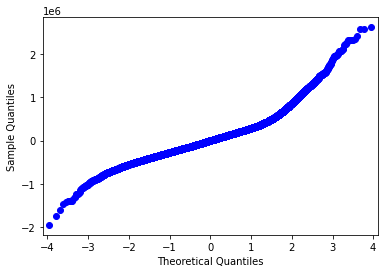

In [44]:
test_model_resids = test_model.resid
sm.qqplot(test_model_resids);

In [28]:
'''
The JB score has a low p-value means that the current model violates the
normality assumption. 
That supports the qq visual with the crooked tail.
'''

'\nThe JB score has a low p-value means that the current model violates the\nnormality assumption. \nThat supports the qq visual with the crooked tail.\n'

# Homoscadasticity

In [29]:
y_hat = test_model.predict()

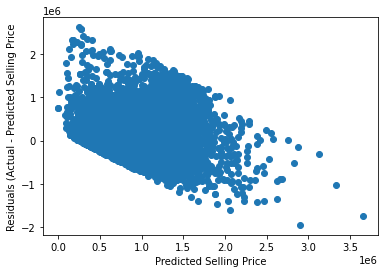

In [30]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted Selling Price",
        ylabel="Residuals (Actual - Predicted Selling Price")
ax.scatter(y_hat, test_model_resids);

# Independence

In [78]:
rows = df[top_corr].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(top_corr))]
vif_df["feature"] = top_corr

vif_df

,VIF,feature
0,2.301713,SqFtTotLiving
1,1.690980,SqFtOpenPorch
2,1.486423,SqFtDeck
